# Benjamin Norton

## Research question/interests

### Interest

I plan to investigate the relationship between probable asteroid impacts and asteroid size. I want to investigate this because asteroids of different sizes can have varying levels of potential damage to the earth. A large asteroid has a higher potential for destruction and can cause widespread damage. In contrast, a smaller one may burn up upon entering the earth's atmosphere or land in a remote area. I plan to see if there are any correlations in this dataset and see if I can use that information to predict future impacts.
<br>
### Research question
**Can we identify potentially hazardous asteroids (PHAs) based on their orbital parameters and physical characteristics, and how hazardous are they?**
<br>
In order to answer this question I will first remove any duplicate or irrelevant data, fill in any missing values, and standardize units and formats across all variables and then merge the datasets into a single dataframe with the object name as the key.
<br>
I will then use the orbit axis, eccentricity, inclination, perihelion argument, node longitude, and other parameters to classify asteroids into different groups based on their likelihood of colliding with Earth (I can also use the impact data cumulative collision probability). I will then look at the asteroid diameter, velocity, and magnitude to estimate the potential impact energy and damage, thus, determining the PHA status of the asteroid.
<br>

================================================================
## Load Data for Analysis

In [1]:
from group34_code.project_functions1 import load_and_process

asteroids = load_and_process("../data/raw/NEO_Earth_Close_Approaches.csv", "../data/raw/orbits.csv")

## Hazard Analysis

We will only look at the worse case scenario for the asteroid impacts, thus, we will assume that the asteroid is spherical, made of mostly nickel-iron and that it's density is 5.32 g/cm^3
[based on the approximate density of M class asteroids](https://en.wikipedia.org/wiki/Standard_asteroid_physical_characteristics)

In [2]:
density = 5.32 # g/cm^3
asteroids["Volume (m^3)"] = asteroids["Diameter"] ** 3 * 4 / 3 * 3.14159 # assuming spherical
asteroids["Mass (kg)"] = asteroids["Volume (m^3)"] * density * 1000
asteroids["Velocity (m/s)"] = asteroids["V relative(km/s)"] * 1000
asteroids["Kinetic Energy (J)"] = 0.5 * asteroids["Mass (kg)"] * asteroids["Velocity (m/s)"] ** 2
asteroids["Kinetic Energy (GJ)"] = asteroids["Kinetic Energy (J)"] / 1e9
asteroids["Kinetic Energy (Megatons)"] = asteroids["Kinetic Energy (J)"] / 4.184e15
asteroids.to_csv("../data/processed/asteroids.csv")
# sort by kinetic energy
asteroids = asteroids.sort_values(by="Kinetic Energy (Megatons)", ascending=False)
asteroids.head()

,Object Name,Object Classification,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),...,H(mag),Diameter,Rarity,PHA,Volume (m^3),Mass (kg),Velocity (m/s),Kinetic Energy (J),Kinetic Energy (GJ),Kinetic Energy (Megatons)
2210,1999 JM8,Apollo Asteroid (Hazard),57800.0,2.7263,0.6411,13.8287,166.7562,133.6496,335.2191,0.9784,...,15.4,8.4,3.0,True,2482.710612,13208020.458394,12690.0,1063484051669959.0,1063484.05167,0.254179
5925,2001 XU10,Apollo Asteroid (Hazard),57800.0,1.7537,0.4394,42.0200,6.9285,310.1666,313.8552,0.9832,...,15.3,3.899,3.0,True,248.283551,1320868.491049,24260.0,388696990161184.875,388696.990161,0.092901
5631,2004 LJ1,Apollo Asteroid (Hazard),57800.0,2.2649,0.5932,23.1175,139.9098,235.5988,228.8320,0.9214,...,15.5,4.394,4.0,True,355.359885,1890514.586297,17170.0,278670262810154.4375,278670.26281,0.066604
988,2005 NZ6,Apollo Asteroid (Hazard),57800.0,1.8341,0.8643,8.4885,48.2864,39.4405,206.6349,0.2488,...,17.5,2.468,2.0,True,62.968552,334992.698183,32140.0,173020311686183.71875,173020.311686,0.041353
5602,2004 QY2,Apollo Asteroid (Hazard),57800.0,1.0840,0.4773,37.0267,104.9607,295.3130,309.3137,0.5666,...,14.6,2.998,3.0,True,112.871196,600474.764225,23290.0,162855991778606.25,162855.991779,0.038924


## Plotting the Diameter vs The Magnitude of the Asteroid

[Text(0.5, 0, 'Diameter (m)'),
 Text(0, 0.5, 'Magnitude'),
 Text(0.5, 1.0, 'Diameter vs Magnitude')]

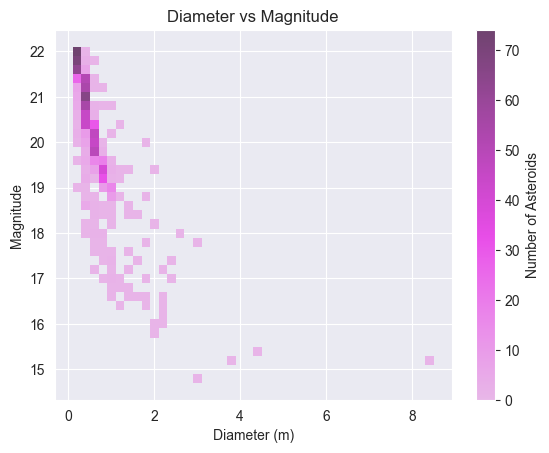

In [3]:
import seaborn as sns

diameter = asteroids["Diameter"]
magnitude = asteroids["Asteroid Magnitude"]

ax = sns.histplot(x=diameter, y=magnitude, binwidth=0.2, cbar=True, cbar_kws={"label": "Number of Asteroids"}, color="violet")
ax.set(xlabel="Diameter (m)", ylabel="Magnitude", title="Diameter vs Magnitude")

## Observations

The diameter of the asteroid is an approximation based on the percieved distance and magnitude of the asteroid over time, as it is not feasible to measure the diameter of an asteroid from earth at any given time, so an estimate is made based on if the asteroid were placed 1 Astronomical Unit (au) away, and 1 au from the Sun and at a zero phase angle.

To keep the data consistent when analysing the hazardous nature of the asteroids, I will only be considering the maximum estimated diameter of the asteroid.

## Trajectory of Top 3 Most Energetic Asteroids

I have written a function that will render the trajetory of an asteroid given it's orbitat characteristics, the spacing of the points indicates how fast the asteroid was traveling at those points, the wider the gaps the faster the asteroid travels. See more details in [asteroid.py](group34_code/asteroid.py)

This visualization helps see how the asteroids are considered close approach asteroids as when they approach the earth's orbital axis they tend to overlap it for a considerable amount of time.

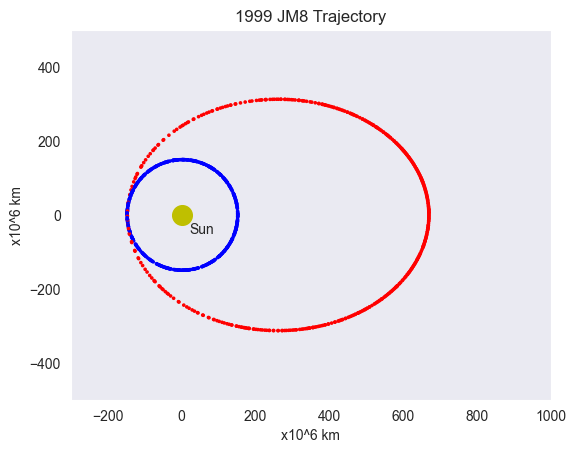

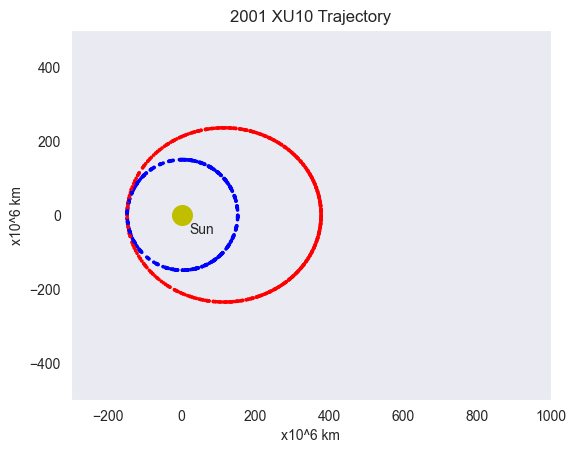

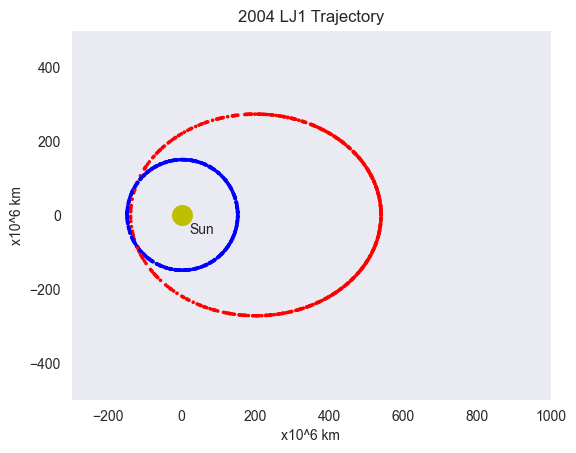

In [4]:
import group34_code.asteroid as ast

# get and render the top 3 most dangerous asteroids
ast.render_asteroid_trajectory(asteroids.head(3).iloc[0])
ast.render_asteroid_trajectory(asteroids.head(3).iloc[1])
ast.render_asteroid_trajectory(asteroids.head(3).iloc[2])

## Closest Approach Distance vs Kinetic Energy

Let's look at the asteroids that come within 0.01 AU (~1.5 million km) of the earth and see how much energy they have

[Text(0.5, 0, 'Closest Approach Distance (AU)'),
 Text(0, 0.5, 'Kinetic Energy (Megatons)'),
 Text(0.5, 1.0, 'Closest Approach Distance vs Kinetic Energy')]

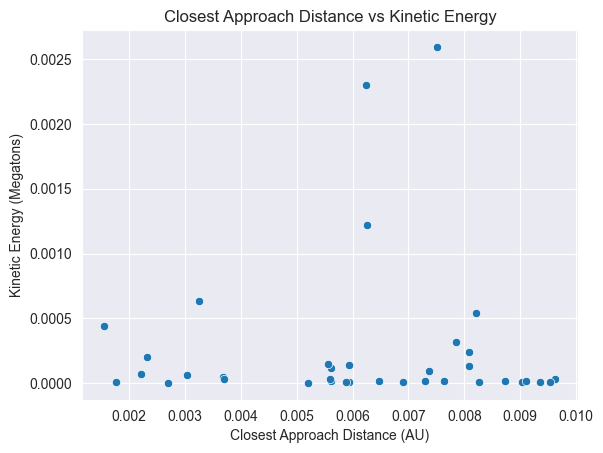

In [5]:
close_approach_dist = asteroids[asteroids["CA DistanceNominal (au)"] < 0.01]["CA DistanceNominal (au)"]
kinetic_energy = asteroids["Kinetic Energy (Megatons)"]

ax = sns.scatterplot(x=close_approach_dist, y=kinetic_energy)
ax.set(xlabel="Closest Approach Distance (AU)", ylabel="Kinetic Energy (Megatons)", title="Closest Approach Distance vs Kinetic Energy")

## Observations

The above plot shows that among the asteroids that come within 0.01 AU of the earth from 1900 to 2200, there only exist a couple which have a significant amount of kinetic energy (> 0.5 Terra Joules or 0.001 Megatons). Let's take a closer look at the asteroid with the highest kinetic energy.

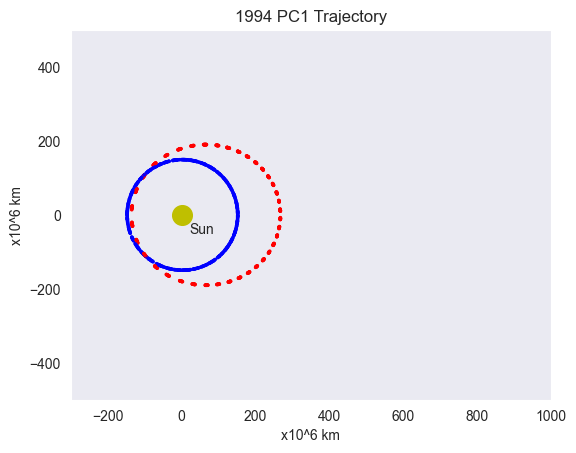

The 1994 PC1 asteroid has a close approach date of 1933-Jan-17
Object Name                                                    1994 PC1
Object Classification                          Apollo Asteroid (Hazard)
Epoch (TDB)                                                     57800.0
Orbit Axis (AU)                                                  1.3463
Orbit Eccentricity                                               0.3283
Orbit Inclination (deg)                                         33.4861
Perihelion Argument (deg)                                       47.6201
Node Longitude (deg)                                           117.8944
Mean Anomoly (deg)                                              281.279
Perihelion Distance (AU)                                         0.9042
Aphelion Distance (AU)                                             1.79
Orbital Period (yr)                                                1.56
Minimum Orbit Intersection Distance (AU)                         0.0001
O

In [6]:
notable_asteroids = asteroids[asteroids["CA DistanceNominal (au)"] < 0.01]
# get the asteroid with the highest kinetic energy
notable_asteroid = notable_asteroids[notable_asteroids["Kinetic Energy (Megatons)"] == notable_asteroids["Kinetic Energy (Megatons)"].max()]
ast.render_asteroid_trajectory(notable_asteroid.iloc[0])
print(f"The {notable_asteroid.iloc[0]['Object Name']} asteroid has a close approach date of", notable_asteroid["Close-Approach (CA) Date"].str.split(" ", expand=True)[0].unique()[0])
print(notable_asteroid.iloc[0])

As we can see, this asteroid's trajectory overlaps with the earths at decent speed (indicated by width of the gaps in the points), however, it approached the earth on the 17th of January 1933, which was a while back.

By looking for the asteroid online I found that the asteroid also had a close approach on the 18th of Janurary in 2022 at 10pm UTC which is not a part of the dataset indicating that the dataset only collected the closet approach of each asteroid, which is a limitation of the dataset.

[![](https://upload.wikimedia.org/wikipedia/commons/5/53/Animation_of_1994_PC1_around_Sun_-_2022_close_approach.gif)](https://en.wikipedia.org/wiki/(7482)_1994_PC1)

Despite the asteroid looking like it came very close to the earth, it actually only came within 1,125,383 km of the earth in 1933, which is more than 2 times as far as the moon is from the earth, thus, there was not much concern about the asteroid colliding with the earth. Also something else that is notable about this asteroid is that it is an S-Class asteroid and has an estimated density of 3.0 g/cm$^3$ vs the assumed density of 5.32 g/cm$^3$, which means that the asteroid is less energetic than the assumed energy at around:

$E = \frac{1}{2}mv^2 = \frac{1}{2} \frac{4}{3} \pi r^3 \rho v^2 = \frac{2}{3} \pi \left(\frac{1355}{2}\right)^3\cdot 0.0003\cdot 19780^2 = 57$Mega Joules or $1.3 \times 10^{-8}$ Megatons

Which is about how much energy a household in canada uses in 6 hours, which is not a lot of energy [Source](https://www150.statcan.gc.ca/n1/daily-quotidien/220502/dq220502b-eng.htm)
<br>
### Summary

In conclusion, potentially hazardous asteroids are asteroids that have a close approach distance of less than 0.05 AU, per the definition, however, when taking a closer look at the distance and estimated energy of the asteroids we find that despite the asteroids don't actually get that close to the earth and if they were to collide with the earth the energy output would not be significant enough to cause any noticable damage to any urban areas.